<a href="https://colab.research.google.com/github/PPythnoni/sound/blob/main/language_classifier_super_reduced_dataset_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa, librosa.display

# dataset one tenth the size of the original dataset - 180 speakers per language
DATA_PATH = "/content/drive/MyDrive/Python/super_small.json"

In [2]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [3]:
def plot_history(history):
  
    fig, axs = plt.subplots(2)

    #accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    #error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [4]:
def prepare_datasets(test_size, validation_size):

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [5]:
def build_model(input_shape):
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(3, activation='softmax'))

    return model

In [6]:
def predict(model, X, y):

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...]

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [7]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 11, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 43, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 41, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 1, 32)         4

In [16]:
X_train.shape

(1620, 87, 13, 1)

In [ ]:
"""n of samples,
n of time bins into which a sound samples is divided, 
n of mfccs extracted from each bin, 
an extra dimension that cnn expects (similarly to color channels in images)"""

In [ ]:
    # create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40)

Epoch 1/40
51/51 [==============================] - 2s 46ms/step - loss: 1.4409 - accuracy: 0.3864 - val_loss: 1.4634 - val_accuracy: 0.3432
Epoch 2/40
51/51 [==============================] - 2s 40ms/step - loss: 1.1108 - accuracy: 0.5105 - val_loss: 1.0616 - val_accuracy: 0.4691
Epoch 3/40
51/51 [==============================] - 2s 41ms/step - loss: 0.8908 - accuracy: 0.6000 - val_loss: 0.9058 - val_accuracy: 0.5753
Epoch 4/40
51/51 [==============================] - 2s 41ms/step - loss: 0.7372 - accuracy: 0.6710 - val_loss: 0.7908 - val_accuracy: 0.6420
Epoch 5/40
51/51 [==============================] - 2s 41ms/step - loss: 0.6223 - accuracy: 0.7346 - val_loss: 0.6780 - val_accuracy: 0.7185
Epoch 6/40
51/51 [==============================] - 2s 41ms/step - loss: 0.5436 - accuracy: 0.7747 - val_loss: 0.5774 - val_accuracy: 0.7630
Epoch 7/40
51/51 [==============================] - 2s 40ms/step - loss: 0.4520 - accuracy: 0.8216 - val_loss: 0.4864 - val_accuracy: 0.8395
Epoch 8/40
51

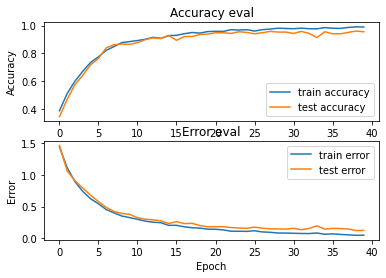

22/22 - 0s - loss: 0.1148 - accuracy: 0.9630

Test accuracy: 0.9629629850387573


In [9]:
plot_history(history)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)